# Cleaning Dataset Using Pandas And Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dropping Columns in a DataFrame

In [2]:
df = pd.read_csv('BL-Flickr-Images-Book.csv')
df.head(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [3]:
to_drop = ['Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver','Contributors','Issuance type','Shelfmarks']
df.drop(columns=to_drop , axis=1, inplace=True)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## Changing Index of a DataFrame

In [4]:
df = df.set_index('Identifier')
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## Tidying Up Fields in Data

In [5]:
df.loc[1905:,'Date of Publication'].head(5)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
Name: Date of Publication, dtype: object

In [6]:
extra_data= df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extra_data.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

In [7]:
df['Date of Publication'] = pd.to_numeric(extra_data)
df['Date of Publication'].dtype

dtype('float64')

In [8]:
df['Date of Publication'].isnull().sum() / len(df)

0.11717147339205986

## Combining str Methods with NumPy to Clean Columns

In [9]:
df['Place of Publication'].head(10)

Identifier
206                                  London
216                London; Virtue & Yorston
218                                  London
472                                  London
480                                  London
481                                  London
519                                  London
667     pp. 40. G. Bryan & Co: Oxford, 1898
874                                 London]
1143                                 London
Name: Place of Publication, dtype: object

In [10]:
df.loc[4157862]

Place of Publication                                  Newcastle-upon-Tyne
Date of Publication                                                1867.0
Publisher                                                      T. Fordyce
Title                   Local Records; or, Historical Register of rema...
Author                      FORDYCE, T. - Printer, of Newcastle-upon-Tyne
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4157862, dtype: object

In [11]:
df.loc[4159587]

Place of Publication                                  Newcastle upon Tyne
Date of Publication                                                1834.0
Publisher                                                Mackenzie & Dent
Title                   An historical, topographical and descriptive v...
Author                                              Mackenzie, E. (Eneas)
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4159587, dtype: object

In [12]:
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]

Identifier
206    True
216    True
218    True
472    True
480    True
Name: Place of Publication, dtype: bool

In [13]:
df['Place of Publication'].head(10)

Identifier
206                                  London
216                London; Virtue & Yorston
218                                  London
472                                  London
480                                  London
481                                  London
519                                  London
667     pp. 40. G. Bryan & Co: Oxford, 1898
874                                 London]
1143                                 London
Name: Place of Publication, dtype: object

## Cleaning the Entire Dataset Using the applymap Function

In [14]:
university_towns = []
with open('university_towns.txt') as file:
     for line in file:
         if '[edit]' in line:
             state = line
         else:
             university_towns.append((state, line))

university_towns[:5]

[('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

In [15]:
towns_df = pd.DataFrame(university_towns,columns=['State', 'RegionName'])
towns_df.head()

,State,RegionName
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


In [16]:
def get_citystate(item):
     if ' (' in item:
         return item[:item.find(' (')]
     elif '[' in item:
         return item[:item.find('[')]
     else:
         return item

In [17]:
towns_df =  towns_df.applymap(get_citystate)
towns_df.head()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


## Renaming Columns and Skipping Rows

In [18]:
olympics_df = pd.read_csv('olympics.csv')
olympics_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [19]:
olympics_df = pd.read_csv('olympics.csv', header=1)
olympics_df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [20]:
new_names =  {'Unnamed: 0': 'Country',
...               '? Summer': 'Summer Olympics',
...               '01 !': 'Gold',
...               '02 !': 'Silver',
...               '03 !': 'Bronze',
...               '? Winter': 'Winter Olympics',
...               '01 !.1': 'Gold.1',
...               '02 !.1': 'Silver.1',
...               '03 !.1': 'Bronze.1',
...               '? Games': '# Games',
...               '01 !.2': 'Gold.2',
...               '02 !.2': 'Silver.2',
...               '03 !.2': 'Bronze.2'}

In [21]:
olympics_df.rename(columns=new_names, inplace=True)
olympics_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


# Seaborn

In [22]:
pstore = pd.read_csv('googleplaystore.csv')

In [23]:
pstore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Distribution Plots

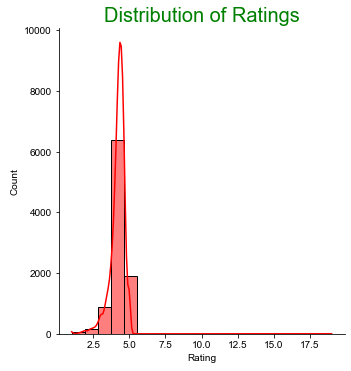

In [24]:
sns.displot(data=pstore.Rating, bins=20, kde=True, color='r')
plt.title("Distribution of Ratings", color='g', fontsize=20)
plt.style.use('seaborn')
plt.show()

## Pie Charts and Bar Charts

In [25]:
pstore['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [26]:
pstore = pstore[~pstore['Content Rating'].isin(["Adults only 18+","Unrated"])]
pstore.reset_index(inplace=True, drop=True)
pstore['Content Rating'].value_counts()

Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: Content Rating, dtype: int64

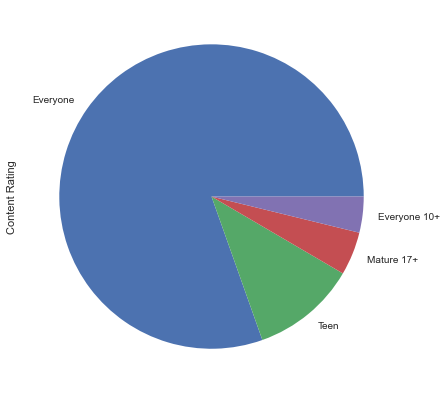

In [27]:
plt.figure(figsize=[9,7])
pstore['Content Rating'].value_counts().plot.pie()
plt.show()

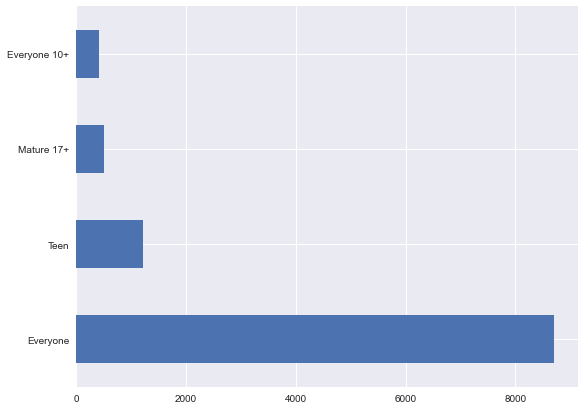

In [28]:
plt.figure(figsize=[9,7])
pstore['Content Rating'].value_counts().plot.barh()
plt.show()

## Scatter Plots

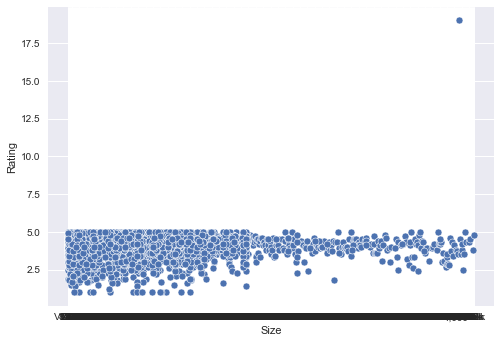

In [29]:
sns.scatterplot(x=pstore.Size, y=pstore.Rating)
plt.show()

## Pair Plots

In [53]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


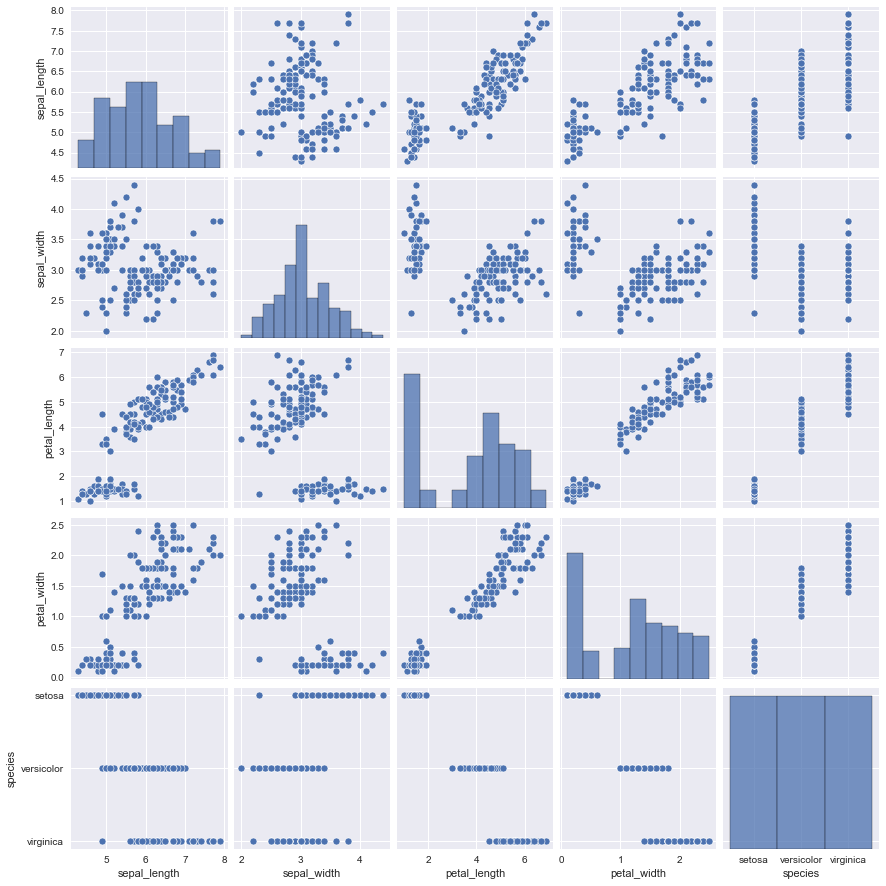

In [54]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
plt.show()

## Heatmaps

In [50]:
heat = pd.pivot_table(pstore, index=['Content Rating'], columns=['Size'], aggfunc='mean')
heat.head()

Rating                                                   \
Size             1.0M   1.1M      1.2M  1.3M      1.4M      1.5M  1.6M   
Content Rating                                                           
Everyone        3.675  4.168  4.057143  3.98  4.081818  4.183784  4.17   
Everyone 10+      NaN    NaN       NaN   NaN       NaN       NaN   NaN   
Mature 17+        NaN    NaN       NaN   NaN  3.000000       NaN   NaN   
Teen              NaN    NaN  5.000000  4.10  4.500000  3.900000  3.80   

                                              ...                           \
Size                1.7M      1.8M      1.9M  ... 975k 976k  97M 980k 982k   
Content Rating                                ...                            
Everyone        4.177778  3.934286  4.180769  ...  3.6  3.7  4.1  4.0  4.5   
Everyone 10+         NaN  4.400000       NaN  ...  NaN  NaN  4.6  NaN  NaN   
Mature 17+           NaN  5.000000  4.000000  ...  NaN  NaN  4.0  NaN  NaN   
Teen            5.000000  4.750000       NaN  ...  NaN  NaN  4.1  NaN  NaN   

                                                              
Size           986k    98M 994k       99M Varies with device  
Content Rating                                                
Everyone        4.1  4.350  4.5  4.437500           4.284936  
Everyone 10+    NaN  4.540  NaN  4.666667           4.241772  
Mature 17+      NaN  4.400  NaN  4.266667           4.234409  
Teen            NaN  4.175  NaN  4.400000           4.259259  

[4 rows x 414 columns]

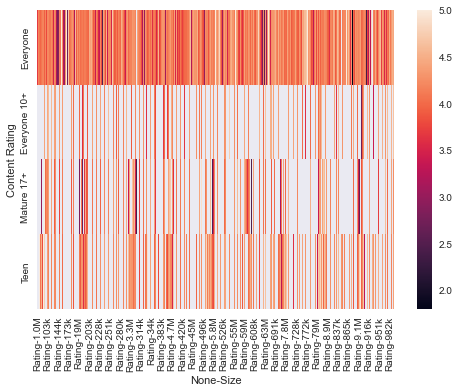

In [51]:
sns.heatmap(heat)
plt.show()

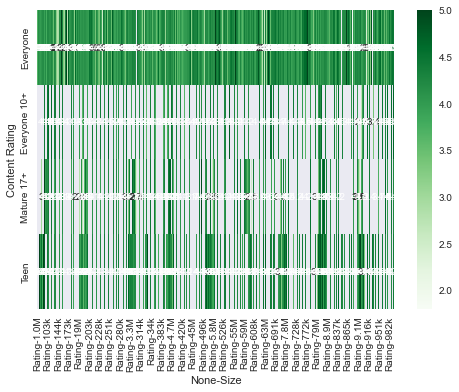

In [52]:
sns.heatmap(heat, cmap='Greens', annot=True)
plt.show()